

You are given the Dubai Properties - Apartments dataset. You tasks are:
- Create an Artificial Neural Network (ANN) model that can predict the price of an apartment based on its given properties.

- You need to clean and preprocess the data as needed.
- Create a custom Dataset class to efficiently load and prepare the data.

- Clearly define the architecture of your ANN model, specifying the number of layers, neurons, and activation functions.
- Make two version of your model with different number of layers and hidden neurons
- Train the model on the prepared data and evaluate its performance on a separate validation set.
- Track the training loss during training and plot it to visualize the learning process.

- Print some sample predictions from the trained model to demonstrate its capabilities.



 Dataset:
 https://www.kaggle.com/datasets/dataregress/dubai-properties-dataset/data

In [1]:
from IPython.display import clear_output

In [2]:
!pip install opendatasets
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download dataregress/dubai-properties-dataset
!unzip /content/dubai-properties-dataset.zip
clear_output()

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import torch.nn as nn
from torchvision import transforms
from sklearn.preprocessing import LabelEncoder
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/properties_data.csv")
df.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [5]:
df.shape

(1905, 38)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

In [7]:
df = df.drop(columns=['id', 'neighborhood'])

In [8]:
# convert cat data to num
label_encoder = LabelEncoder()
df['quality'] = label_encoder.fit_transform(df['quality'])

In [9]:
df.head()

,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,25.113208,55.138932,2700000,1079,2502.32,1,2,2,False,False,...,False,False,True,False,False,False,False,False,True,False
1,25.106809,55.151201,2850000,1582,1801.52,2,2,2,False,False,...,False,False,True,True,False,False,False,False,True,False
2,25.063302,55.137728,1150000,1951,589.44,3,5,2,True,True,...,False,True,True,True,False,False,False,True,True,True
3,25.227295,55.341761,2850000,2020,1410.89,2,3,1,False,True,...,False,False,False,False,False,False,False,False,False,False
4,25.114275,55.139764,1729200,507,3410.65,0,1,2,False,False,...,False,True,True,True,True,False,False,True,True,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latitude             1905 non-null   float64
 1   longitude            1905 non-null   float64
 2   price                1905 non-null   int64  
 3   size_in_sqft         1905 non-null   int64  
 4   price_per_sqft       1905 non-null   float64
 5   no_of_bedrooms       1905 non-null   int64  
 6   no_of_bathrooms      1905 non-null   int64  
 7   quality              1905 non-null   int64  
 8   maid_room            1905 non-null   bool   
 9   unfurnished          1905 non-null   bool   
 10  balcony              1905 non-null   bool   
 11  barbecue_area        1905 non-null   bool   
 12  built_in_wardrobes   1905 non-null   bool   
 13  central_ac           1905 non-null   bool   
 14  childrens_play_area  1905 non-null   bool   
 15  childrens_pool       1905 non-null   b

In [11]:
df.to_csv('clean_properties_data.csv', index=False)

In [12]:
df_path = '/content/clean_properties_data.csv'

In [13]:
class CustomDataset(Dataset):
    def __init__(self, df_path, scaler_X=None, scaler_y=None):
        self.data = pd.read_csv(df_path)
        self.num_features = len(self.data.columns) - 1
        self.X = self.data.drop(columns=['price']).values
        self.y = self.data['price'].values.reshape(-1, 1)

        if scaler_X is None:
            scaler_X = StandardScaler()
        if scaler_y is None:
            scaler_y = StandardScaler()

        self.scaler_X = scaler_X.fit_transform(self.X)
        self.scaler_y = scaler_y.fit_transform(self.y).flatten()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # Retrieve the data and label at the given index
        x = torch.tensor(self.scaler_X[index], dtype=torch.float32)  # Ensure x is a sequence
        y = torch.tensor(self.scaler_y[index], dtype=torch.float32)  # Ensure y is a sequence
        return x, y

In [14]:
# Initialize the dataset
dataset = CustomDataset(df_path = df_path)

In [15]:
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [16]:
b_size = 32
train_loader = DataLoader(train_dataset, batch_size=b_size, shuffle=True)
val_loader =   DataLoader(val_dataset, batch_size=b_size)
test_loader =  DataLoader(test_dataset, batch_size=b_size)

## ANN

In [17]:
class ANN1(nn.Module):
    def __init__(self,input_dim):
        super(ANN1,self).__init__()
        self.Linear1 = nn.Linear(input_dim,256)
        self.Linear2 = nn.Linear(256,128)
        self.Linear3 = nn.Linear(128,1)
        self.Relu   = nn.ReLU()

    def forward(self,x):
       x = self.Linear1(x)
       x = self.Relu(x)
       x = self.Linear2(x)
       x = self.Relu(x)
       x = self.Linear3(x)
       return x


class ANN2(nn.Module):
    def __init__(self,input_dim):
        super(ANN2,self).__init__()
        self.Linear1 = nn.Linear(input_dim,256)
        self.Linear2 = nn.Linear(256,128)
        self.Linear3 = nn.Linear(128,64)
        self.Linear4 = nn.Linear(64,32)
        self.Linear5 = nn.Linear(32,16)
        self.Linear6 = nn.Linear(16,1)

    def forward(self,x):
       x = self.Linear1(x)
       x = self.Relu(x)
       x = self.Linear2(x)
       x = self.Relu(x)
       x = self.Linear3(x)
       x = self.Relu(x)
       x = self.Linear4(x)
       x = self.Relu(x)
       x = self.Linear5(x)
       x = self.Relu(x)
       x = self.Linear6(x)
       return x

In [18]:
# Function to train the model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * inputs.size(0)
        epoch_train_loss = running_train_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)

        # Validation loss
        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), targets)
                running_val_loss += loss.item() * inputs.size(0)
            epoch_val_loss = running_val_loss / len(val_loader.dataset)
            val_losses.append(epoch_val_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

    return train_losses, val_losses

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
learning_rate = 0.001
num_epochs = 10
num_features = dataset.num_features

model1=ANN1(num_features).to(device)
model2=ANN1(num_features).to(device)


criterion = nn.MSELoss()

optimizer1 = optim.Adam(model1.parameters(), lr=learning_rate)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)

## Mosel1

In [20]:
# Training and evaluating each model
train_losses, val_losses = train_model(model1, train_loader, val_loader, criterion, optimizer1, num_epochs=10)

Epoch [1/10], Train Loss: 0.4315, Val Loss: 0.1364
Epoch [2/10], Train Loss: 0.0762, Val Loss: 0.0818
Epoch [3/10], Train Loss: 0.0362, Val Loss: 0.0545
Epoch [4/10], Train Loss: 0.0230, Val Loss: 0.0303
Epoch [5/10], Train Loss: 0.0128, Val Loss: 0.0384
Epoch [6/10], Train Loss: 0.0093, Val Loss: 0.0217
Epoch [7/10], Train Loss: 0.0068, Val Loss: 0.0292
Epoch [8/10], Train Loss: 0.0051, Val Loss: 0.0245
Epoch [9/10], Train Loss: 0.0056, Val Loss: 0.0337
Epoch [10/10], Train Loss: 0.0043, Val Loss: 0.0253


Model 1 Validation Loss: 0.0253


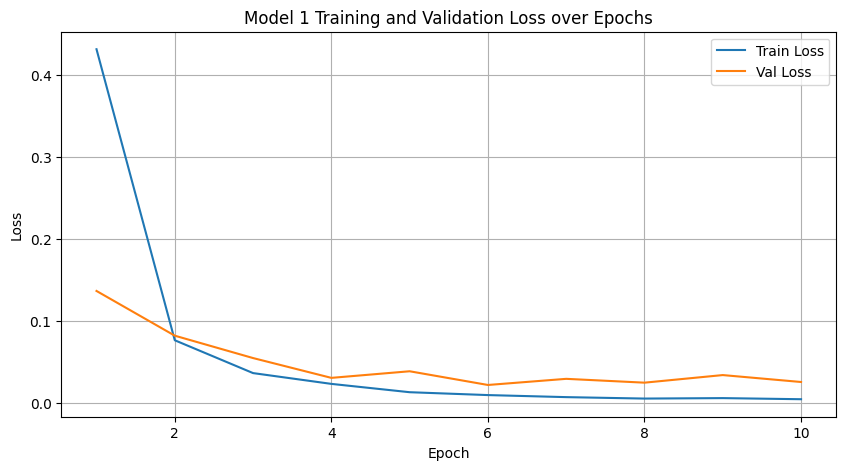

In [21]:
# Evaluation on validation set
model1.eval()
val_loss = 0.0
with torch.no_grad():
    for inputs, targets in val_loader:
        outputs = model1(inputs)
        val_loss += criterion(outputs.squeeze(), targets).item() * inputs.size(0)
    val_loss /= len(val_loader.dataset)

print(f"Model 1 Validation Loss: {val_loss:.4f}")

# Plotting the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.title(f'Model 1 Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Model2

In [22]:
# Training and evaluating each model
train_losses, val_losses = train_model(model2, train_loader, val_loader, criterion, optimizer2, num_epochs=10)

Epoch [1/10], Train Loss: 0.4474, Val Loss: 0.1664
Epoch [2/10], Train Loss: 0.0756, Val Loss: 0.0847
Epoch [3/10], Train Loss: 0.0326, Val Loss: 0.0686
Epoch [4/10], Train Loss: 0.0178, Val Loss: 0.0672
Epoch [5/10], Train Loss: 0.0092, Val Loss: 0.0419
Epoch [6/10], Train Loss: 0.0080, Val Loss: 0.0532
Epoch [7/10], Train Loss: 0.0071, Val Loss: 0.0526
Epoch [8/10], Train Loss: 0.0046, Val Loss: 0.0399
Epoch [9/10], Train Loss: 0.0054, Val Loss: 0.0488
Epoch [10/10], Train Loss: 0.0039, Val Loss: 0.0368


Model 2 Validation Loss: 0.0253


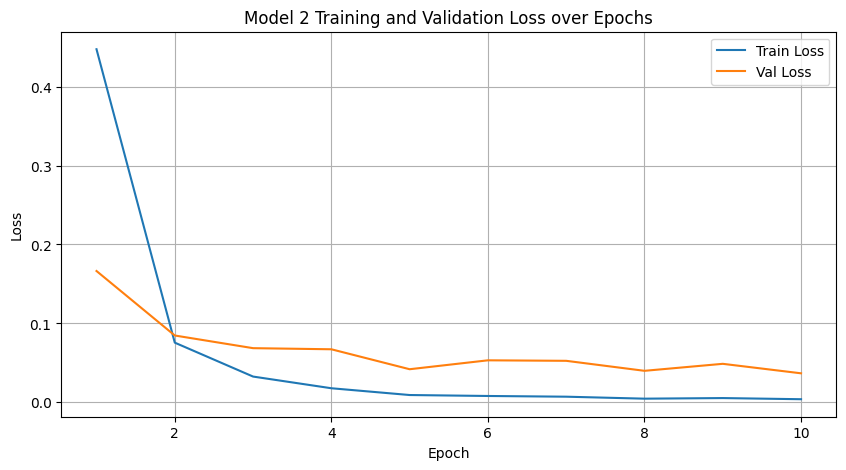

In [23]:
# Evaluation on validation set
model2.eval()
val_loss = 0.0
with torch.no_grad():
    for inputs, targets in val_loader:
        outputs = model1(inputs)
        val_loss += criterion(outputs.squeeze(), targets).item() * inputs.size(0)
    val_loss /= len(val_loader.dataset)
print(f"Model 2 Validation Loss: {val_loss:.4f}")

# Plotting the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.title(f'Model 2 Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

